In [1]:
# ##################################################################################
# Archimedes, Measurement of a circle
# ----------------------------------------------------------------------------------
#
# Development of the Archimedes equations for the inner polygon.
# Version 0.3
#
# Archimedes, Measurement of a circle, Proposition 3 Part II contains the 
# solution for the calculation of an approximation of pi via inscribed inner 
# polygons. The derivation carried out by hand is checked below with SageMath 
# using a symbolic calculation. The derivation can be checked using an iterative 
# algorithm. 
#
# The geometric relationships for the inscribed polygon are more difficult to 
# grasp than for the circumscribed polygon. Knowledge of the ray theorem, Thales'
# theorem, Pythagoras' theorem and Euclid's theorems is necessary to understand
# the derivation. 
#
# The following derivations are almost completely automated, so that errors can be 
# avoided. Some terms had to be used and edited by copy and paste in order to use 
# them specifically.
# 
# Open issues are:
# 1. How can an expression be extracted from a square root.
#
# ----------------------------------------------------------------------------------
# References
#
# [1] T. L. HEATH, Sc.D., The Works of Archimedes, EDITED IN MODERN NOTATION, 
# WITH INTRODUCTORY CHAPTERS, CAMBRIDGE: AT THE UNIVERSITY PRESS, 1897
# [2] Dr. Saskia Roos, Michael Jung, An Introductory Course on Sage, Lecture
# Notes Summer Term 2020, University of Potsdam, Sep 30, 2020
# [3] SageMath, The Sage Development Team, Symbolic Calculus, Release 10.1, 
# Aug 21, 2023
# [4] SageMath, the Sage Mathematics Software System (Version 10.1), The Sage
# Developers, https://www.sagemath.org, 2019
# ##################################################################################

In [2]:
html("""<font color='purple'><b><H1>User defined functions</H1></b></font><br/>""")

<font color='purple'><b><H1>User defined functions</H1></b></font><br/>

In [3]:
# User defined function println for printing lines.
def println(exp):
    '''Function for printing lines with line spacing in form of newlines before
    and after the line. We have to take care that an SageMath expressions is 
    converted to a string before printing.'''
    # Convert the type of line to a string.
    line = str(exp)
    # Print text, a line or a string to the notebook.
    print("\n{0}\n".format(line))
    # End of function. Return None.
    return None

In [4]:
# Initialise the global variables.
EqNo = 0
LnLen = 80
# LnLen = -1 <- Disabled global LnLen

# User defined function println_eqno for printing equations.
def println_eqno(exp, lnlen=80):
    '''Function for printing lines with line spacing in form of newlines before
    and after the line.'''
    global EqNo, LnLen
    if LnLen != -1:
        lnlen = LnLen
    # Convert the type of line to a string.
    line = str(exp)
    # Calculate the necessary number of spaces. 
    spclen = lnlen - len(line)
    # Create the string with the spaces.
    space = "".join(u'\u0020' for i in range(spclen))
    # Print text, a line or a string to the notebook.
    EqNo += 1
    print("\n{0}{1}(Equation {2})\n".format(line, space, EqNo))
    exp.show()
    # End of function. Return None.
    return None

In [5]:
def plot_figure(imgfn, xsize=8, ysize=8):
    '''Use matlibplot to show an image.'''
    # Import the matplotlib modules by name.
    import matplotlib.pyplot as plt
    import matplotlib.image as img
    import matplotlib.image as figure
    # Read the PNG graphic file.
    img = img.imread(imgfn) 
    # Do not show axes and frame.
    plt.axis('off')
    # Scale the image on the notebook.
    # plt.rcdefaults() resets the image size.
    plt.rcParams['figure.figsize'] = [xsize, ysize]
    # Change the paramter for a larger or a smaller graphic.   
    # plt.title('Title of the graphic') adds a title to the image.
    plt.imshow(img)
    plt.show()
    # End of function. Return None.
    return None

In [6]:
html("""<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>Construction of Figure 4</H1></b></font><br/>""")

<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>Construction of Figure 4</H1></b></font><br/>

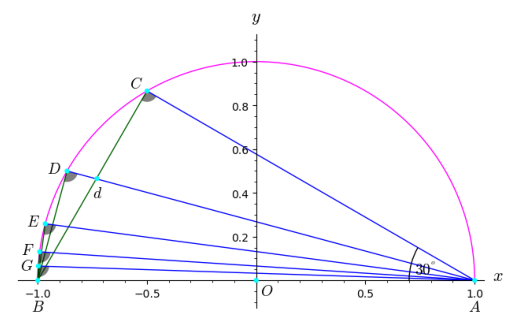

In [7]:
plot_figure("archimedes_figure4.png")

In [8]:
html("""<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>
Derivation of the iterative determination equations</H1></b></font><br/>""")

<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>
Derivation of the iterative determination equations</H1></b></font><br/>

In [9]:
# For the hexagon AB, AC and BC are known. AB is the diameter of the circle.
# AB is constand, while AC and BC are used to calculate AD and BD and so on.
# 
# AC = sqrt(3)
# AB = 2
# BC = 1

In [10]:
# Define the variables. Keep in Mind, that AB (diameter of the circle) is a constant.
var('AC Cd AB Bd')
# Euclid Book VI Proposition 3.
print("Euclid Book VI Proposition 3:")
eq0 = AC / Cd == AB / Bd
println_eqno(eq0)

Euclid Book VI Proposition 3:

AC/Cd == AB/Bd                                                                  (Equation 1)



AC/Cd == AB/Bd

In [11]:
var('BC')
# Devide Equation 1 by BC.
print("Devide Equation 1 by BC:")
eq1 = eq0 * 1/BC
println_eqno(eq1)

Devide Equation 1 by BC:

AC/(BC*Cd) == AB/(BC*Bd)                                                        (Equation 2)



AC/(BC*Cd) == AB/(BC*Bd)

In [12]:
# Multiply Equation 2 with Cd.
print("Multiply Equation 2 by Cd:")
eq2 = eq1 * Cd 
println_eqno(eq2)

Multiply Equation 2 by Cd:

AC/BC == AB*Cd/(BC*Bd)                                                          (Equation 3)



AC/BC == AB*Cd/(BC*Bd)

In [13]:
# Multiply Equation 3 with Bd.
print("Multiply Equation 3 by Bd:")
eq3 = eq2 * Bd
println_eqno(eq3)

Multiply Equation 3 by Bd:

AC*Bd/BC == AB*Cd/BC                                                            (Equation 4)



AC*Bd/BC == AB*Cd/BC

In [14]:
# Add a term on left and right hand side to Equation 4.
print("Add the term (Bd*AB)/BC on left and right hand side:")
eq4 = eq3 + (Bd*AB)/BC
println_eqno(eq4)

Add the term (Bd*AB)/BC on left and right hand side:

AB*Bd/BC + AC*Bd/BC == AB*Bd/BC + AB*Cd/BC                                      (Equation 5)



AB*Bd/BC + AC*Bd/BC == AB*Bd/BC + AB*Cd/BC

In [15]:
# Simplify Equation 5.
print("Simplify Equation 5:")
eq5a = eq4.full_simplify()
println(eq5a); eq5a.show()

Simplify Equation 5:

(AB + AC)*Bd/BC == (AB*Bd + AB*Cd)/BC



(AB + AC)*Bd/BC == (AB*Bd + AB*Cd)/BC

In [16]:
# Simplify and factorise Equation 5.
print("Simplify and factorise Equation 5:")
eq5 = eq4.full_simplify().factor()
println_eqno(eq5)

Simplify and factorise Equation 5:

(AB + AC)*Bd/BC == AB*(Bd + Cd)/BC                                              (Equation 6)



(AB + AC)*Bd/BC == AB*(Bd + Cd)/BC

In [17]:
# Devide Equation 6 by Bd.
print("Divide Equation 6 by Bd:")
eq6 = eq5 / Bd
println_eqno(eq6)

Divide Equation 6 by Bd:

(AB + AC)/BC == AB*(Bd + Cd)/(BC*Bd)                                            (Equation 7)



(AB + AC)/BC == AB*(Bd + Cd)/(BC*Bd)

In [18]:
# We know, that BC = Bd + Cd is.
# We know also that (AB*Bd + AB*Cd) = AB*(Bd + Cd).
# So we rewrite Equation 7.
print("Equation 7 rewritten by hand:")
eq7 = (AB + AC)/BC == AB*BC/(BC*Bd)
println_eqno(eq7)

Equation 7 rewritten by hand:

(AB + AC)/BC == AB/Bd                                                           (Equation 8)



(AB + AC)/BC == AB/Bd

In [19]:
var('AD BD')
# And now we consider AD/BD and
# use AB/Bd = AC/Cd = AD/BD.
print("Make use of AD/BD = AB/Bd:")
eq9 = AD/BD == (AB + AC)/BC
println_eqno(eq9)

Make use of AD/BD = AB/Bd:

AD/BD == (AB + AC)/BC                                                           (Equation 9)



AD/BD == (AB + AC)/BC

In [20]:
# Square Equation 9.
print("Square Equation 9:")
eq10 = eq9^2
println_eqno(eq10)

Square Equation 9:

AD^2/BD^2 == (AB + AC)^2/BC^2                                                   (Equation 10)



AD^2/BD^2 == (AB + AC)^2/BC^2

In [21]:
# Solve Equation 10 for AD^2.
print("Solve the equation for AD^2:")
eq11 = solve(eq10, AD^2)
println_eqno(eq11[0])

Solve the equation for AD^2:

AD^2 == (AB^2 + 2*AB*AC + AC^2)*BD^2/BC^2                                       (Equation 11)



AD^2 == (AB^2 + 2*AB*AC + AC^2)*BD^2/BC^2

In [22]:
# Try to factorise Equation 11. 
print("Factorise the equation:")
eq12 = eq11[0].factor()
println_eqno(eq12)

Factorise the equation:

AD^2 == (AB + AC)^2*BD^2/BC^2                                                   (Equation 12)



AD^2 == (AB + AC)^2*BD^2/BC^2

In [23]:
# Get the determination equation for AD^2.
print("Apply the Pythagorean theorem:")
eq13 = AD^2 == AB^2 - BD^2
println_eqno(eq13)

Apply the Pythagorean theorem:

AD^2 == AB^2 - BD^2                                                             (Equation 13)



AD^2 == AB^2 - BD^2

In [24]:
# We are looking for the edge length BD.
print("Combine RHS of Equation 12 and RHS of Equation 13:")
eq14a = eq12.rhs() == eq13.rhs() 
println(eq14a); eq14a.show(); print("\n")
print("Solve the equation for BD^2:")
eq14 = solve(eq14a, BD^2)
println_eqno(eq14[0])

Combine RHS of Equation 12 and RHS of Equation 13:

(AB + AC)^2*BD^2/BC^2 == AB^2 - BD^2



(AB + AC)^2*BD^2/BC^2 == AB^2 - BD^2



Solve the equation for BD^2:

BD^2 == AB^2*BC^2/(AB^2 + 2*AB*AC + AC^2 + BC^2)                                (Equation 14)



BD^2 == AB^2*BC^2/(AB^2 + 2*AB*AC + AC^2 + BC^2)

In [25]:
# Factorise Equation 14.
print("Factorise the equation:")
eq15 = BD^2 == AB^2*BC^2/((AB^2 + 2*AB*AC + AC^2).factor() + BC^2)
println_eqno(eq15)

Factorise the equation:

BD^2 == AB^2*BC^2/((AB + AC)^2 + BC^2)                                          (Equation 15)



BD^2 == AB^2*BC^2/((AB + AC)^2 + BC^2)

In [26]:
# Get the determination equation for AD^2.
print("Apply the Pythagorean theorem:")
eq16 = AD^2 == AB^2 - eq15.rhs()
println_eqno(eq16)

Apply the Pythagorean theorem:

AD^2 == -AB^2*BC^2/((AB + AC)^2 + BC^2) + AB^2                                  (Equation 16)



AD^2 == -AB^2*BC^2/((AB + AC)^2 + BC^2) + AB^2

In [27]:
# Simplify Equation 16.
print("Full simplify and factorise:")
eq16a = eq16.full_simplify().factor()
println_eqno(eq16a)

Full simplify and factorise:

AD^2 == (AB + AC)^2*AB^2/(AB^2 + 2*AB*AC + AC^2 + BC^2)                         (Equation 17)



AD^2 == (AB + AC)^2*AB^2/(AB^2 + 2*AB*AC + AC^2 + BC^2)

In [28]:
# Simplify Equation 17.
print("Rewrite the equation by hand and factorise them:")
eq17 = AD^2 == (AB^4 + 2*AB^3*AC + AB^2*AC^2).factor()/((AB^2 + 2*AB*AC + AC^2).factor() + BC^2)
println_eqno(eq17)

Rewrite the equation by hand and factorise them:

AD^2 == (AB + AC)^2*AB^2/((AB + AC)^2 + BC^2)                                   (Equation 18)



AD^2 == (AB + AC)^2*AB^2/((AB + AC)^2 + BC^2)

In [29]:
# Simplify the square roots.
print("Canonicalise the radicals and factorise the equation:")
eq18 = (eq17^(1/2)).canonicalize_radical().factor()
println_eqno(eq18)

Canonicalise the radicals and factorise the equation:

AD == (AB + AC)*AB/sqrt(AB^2 + 2*AB*AC + AC^2 + BC^2)                           (Equation 19)



AD == (AB + AC)*AB/sqrt(AB^2 + 2*AB*AC + AC^2 + BC^2)

In [30]:
# Copy and past last raw equation and factorise the radical.
print("Factorise the term in the square root of the denominator:")
eq18a = AD == (AB + AC)*AB/sqrt((AB^2 + 2*AB*AC + AC^2).factor() + BC^2) 
println(eq18); eq18a.show()

Factorise the term in the square root of the denominator:

AD == (AB + AC)*AB/sqrt(AB^2 + 2*AB*AC + AC^2 + BC^2)



AD == (AB + AC)*AB/sqrt((AB + AC)^2 + BC^2)

In [31]:
# For simplification purposes, the term (AB+AC)^2 can be factored out of the equation.

In [32]:
print("Equation decomposition for testing purposes.")
rhs = eq18a.rhs(); nr = rhs().numerator(); dr = rhs().denominator()
print("RHS: "); rhs.show()
print("Numerator:"); nr.show()
print("Denominator:"); dr.show()
ops = dr.operands()
print("Operands: ", ops)

Equation decomposition for testing purposes.
RHS: 


(AB + AC)*AB/sqrt((AB + AC)^2 + BC^2)

Numerator:


(AB + AC)*AB

Denominator:


sqrt(AB^2 + 2*AB*AC + AC^2 + BC^2)

Operands:  [AB^2 + 2*AB*AC + AC^2 + BC^2, 1/2]


In [33]:
html("""<font color='green'><b><H1>Archimedes, Measurement of a Circle<br>Determination equations</H1></b></font><br/>""")

<font color='green'><b><H1>Archimedes, Measurement of a Circle<br>Determination equations</H1></b></font><br/>

In [34]:
# First Archimedes determination equation.
Eq1 = AD == AB/sqrt(1+(BC^2/(AB+AC)^2))
println_eqno(Eq1)


AD == AB/sqrt(BC^2/(AB + AC)^2 + 1)                                             (Equation 20)



AD == AB/sqrt(BC^2/(AB + AC)^2 + 1)

In [35]:
# Second Archimedes determination equation.
Eq2 = BD == sqrt(AB^2 - AD^2)
println_eqno(Eq2)


BD == sqrt(AB^2 - AD^2)                                                         (Equation 21)



BD == sqrt(AB^2 - AD^2)

In [36]:
# After the first iteration Eq. 1 and Eq. 2 are the start values for the
# next iteration. Eq. 1 is the new length of the hypothenuse and Eq. 2 is
# the new length of the edge. Archimedes did this for (6), 12, 24, 48 and
# 96 edges.

In [37]:
html("""<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Algorithmus</H1></b></font><br/>""")

<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Algorithmus</H1></b></font><br/>

In [38]:
# Delete all user-defined variables, reset all global variables back to their
# default states, and reset all interfaces to other computer algebra systems.
reset()

In [39]:
# We are using Eq1 and Eq2 for testing purposes.

# Start values 6-gon (hexagon)
AC = sqrt(3)
AB = 2
BC = 1

# Number of iterations. 5 means up to a 96-gon.
numiter = 5

for i in range(0, numiter):
    # Calculate number of edges.
    n = 6 * 2^i
    # Print number of edges.
    print(n)
    # No iteration on first loop.
    if i == 0:
        # Print value of Pi.
        print(((BC * n)/2).n())
    else:    
        # Calculate hypotenuse and length of edge.
        AD = AB/sqrt(BC^2/(AB + AC)^2 + 1)
        BD = sqrt(AB^2 - AD^2)
        # Calculate approximation for pi.
        api = ((BD * n) / 2).n()
        # Store values.
        BC = BD
        AC = AD
        # Print value of Pi.
        print(api)

6
3.00000000000000
12
3.10582854123025
24
3.13262861328123
48
3.13935020304685
96
3.14103195089037
